In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from learning_lidar.learning_phase.nn_analysis_utils import plot_pivot_table,generate_results_table
from learning_lidar.utils import global_settings as gs


In [26]:
# set visualization
import seaborn as sns
from learning_lidar.utils import vis_utils
from matplotlib import font_manager

sns.set_palette(sns.color_palette("tab10"))

plt.rcParams['figure.dpi'] = vis_utils.FIGURE_DPI
plt.rcParams['savefig.dpi'] = vis_utils.SAVEFIG_DPI

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rc('text', usetex=False)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [27]:
load_preloaded_results = True
overlap = False
results_folder = os.path.join(gs.PKG_ROOT_DIR, 'results')

# postprocessing LCNET results from jason state files saved in  `runs_board.xlsx`

In [28]:
if not load_preloaded_results:
    total_results = generate_results_table(results_folder=results_folder,experiments_table_fname='runs_board.xlsx')
else:
    #current_res_fname = os.path.join(results_folder,'curr_total_results.csv')
    current_res_fname = os.path.join(results_folder,'remote_total_results.csv')
    total_results = pd.read_csv(current_res_fname)


In [29]:
analyse_results = total_results[total_results.training_iteration>1]
analyse_results = analyse_results[analyse_results.overlap==overlap]
analyse_results = analyse_results[analyse_results.u_hsize]
use_bg = []
for idx, row in total_results.iterrows():
        flag_bg = row.use_bg
        if type(flag_bg) == str:
            if flag_bg == 'False' or flag_bg == 'True':
                use_bg.append(eval(flag_bg))
            else:
                use_bg.append(flag_bg)
        else:
            use_bg.append(flag_bg)
total_results['use_bg'] = use_bg

## 1. Choosing Learning rate
1. X: range_corr(lidar), attbsc(molecular). Y:LC
> use_normalization = False
> use_power = True
> source = lidar

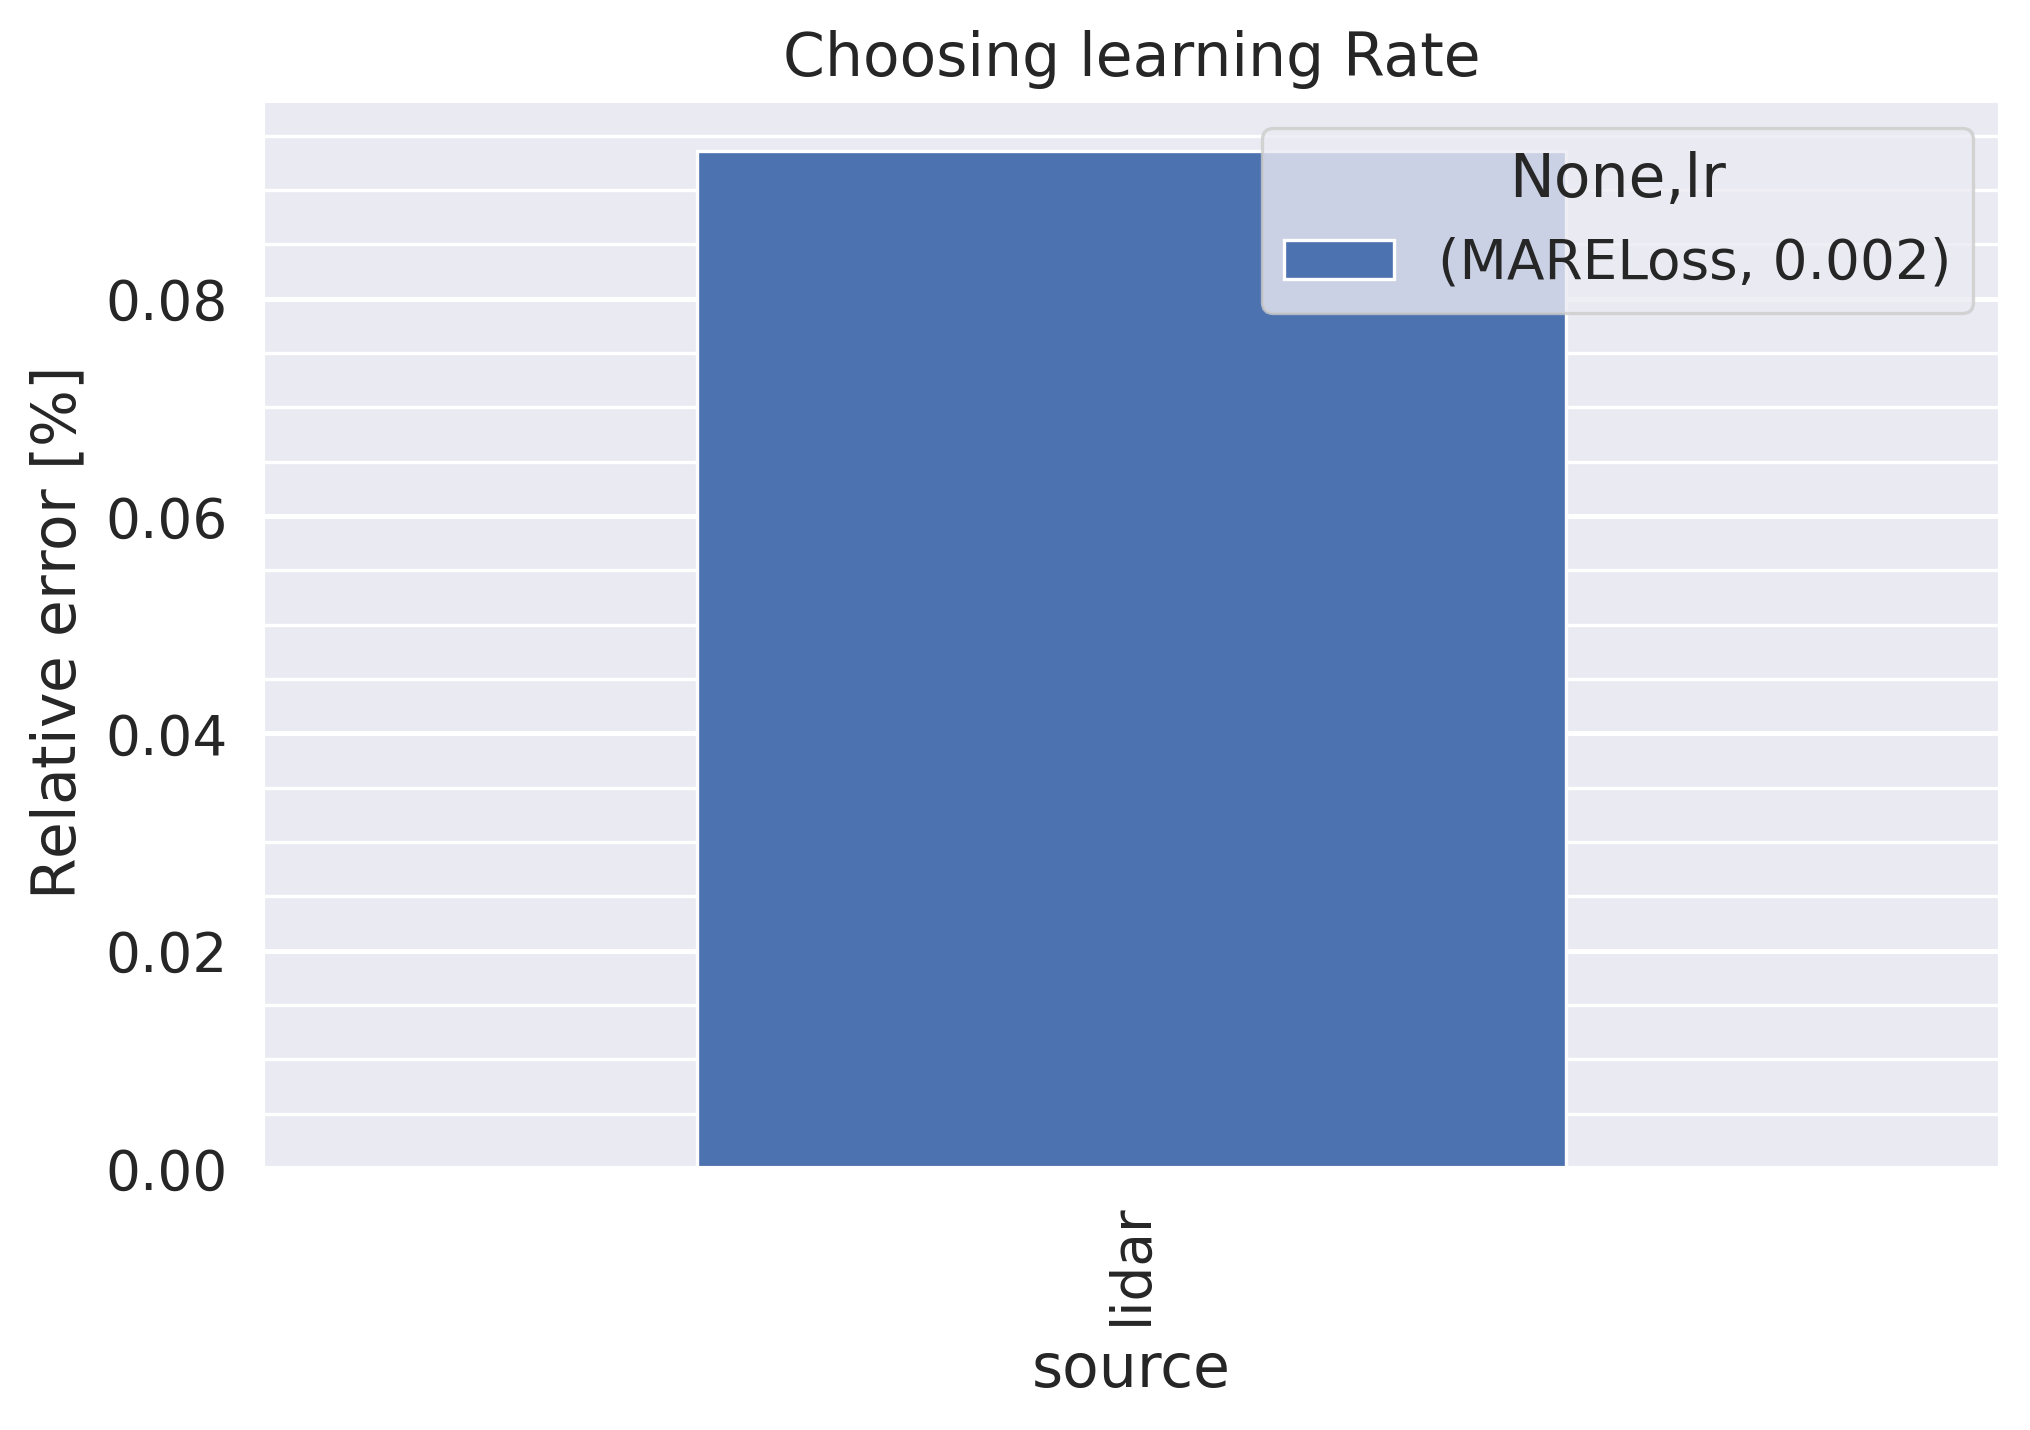

In [30]:
lidar_res = analyse_results[analyse_results.source=='lidar' ]
#lidar_res = lidar_res[lidar_res.use_bg==False ]
pow_lidar = lidar_res[(~lidar_res.dnorm & lidar_res.use_power==True ) ]

p_table = pd.pivot_table(pow_lidar[pow_lidar.bsize==32][pow_lidar.fc_size>4],#[pow_lidar.note=='ok'],
               values=['MARELoss'],
               columns= ['lr'],
               index=['source'],#'fc_size'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Choosing learning Rate')

## 2. FC vs. hidden sizes
1. X: range_corr(lidar), attbsc(molecular). Y:LC
> use_normalization = False
> use_power = True
> source = lidar
> lr = 0.001 or lr = 0.005

In [31]:
all_wav = analyse_results #[analyse_results.wavelength=='all']
all_wavs_configABCD = all_wav[all_wav.config!='Other']

C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\1975118610.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]


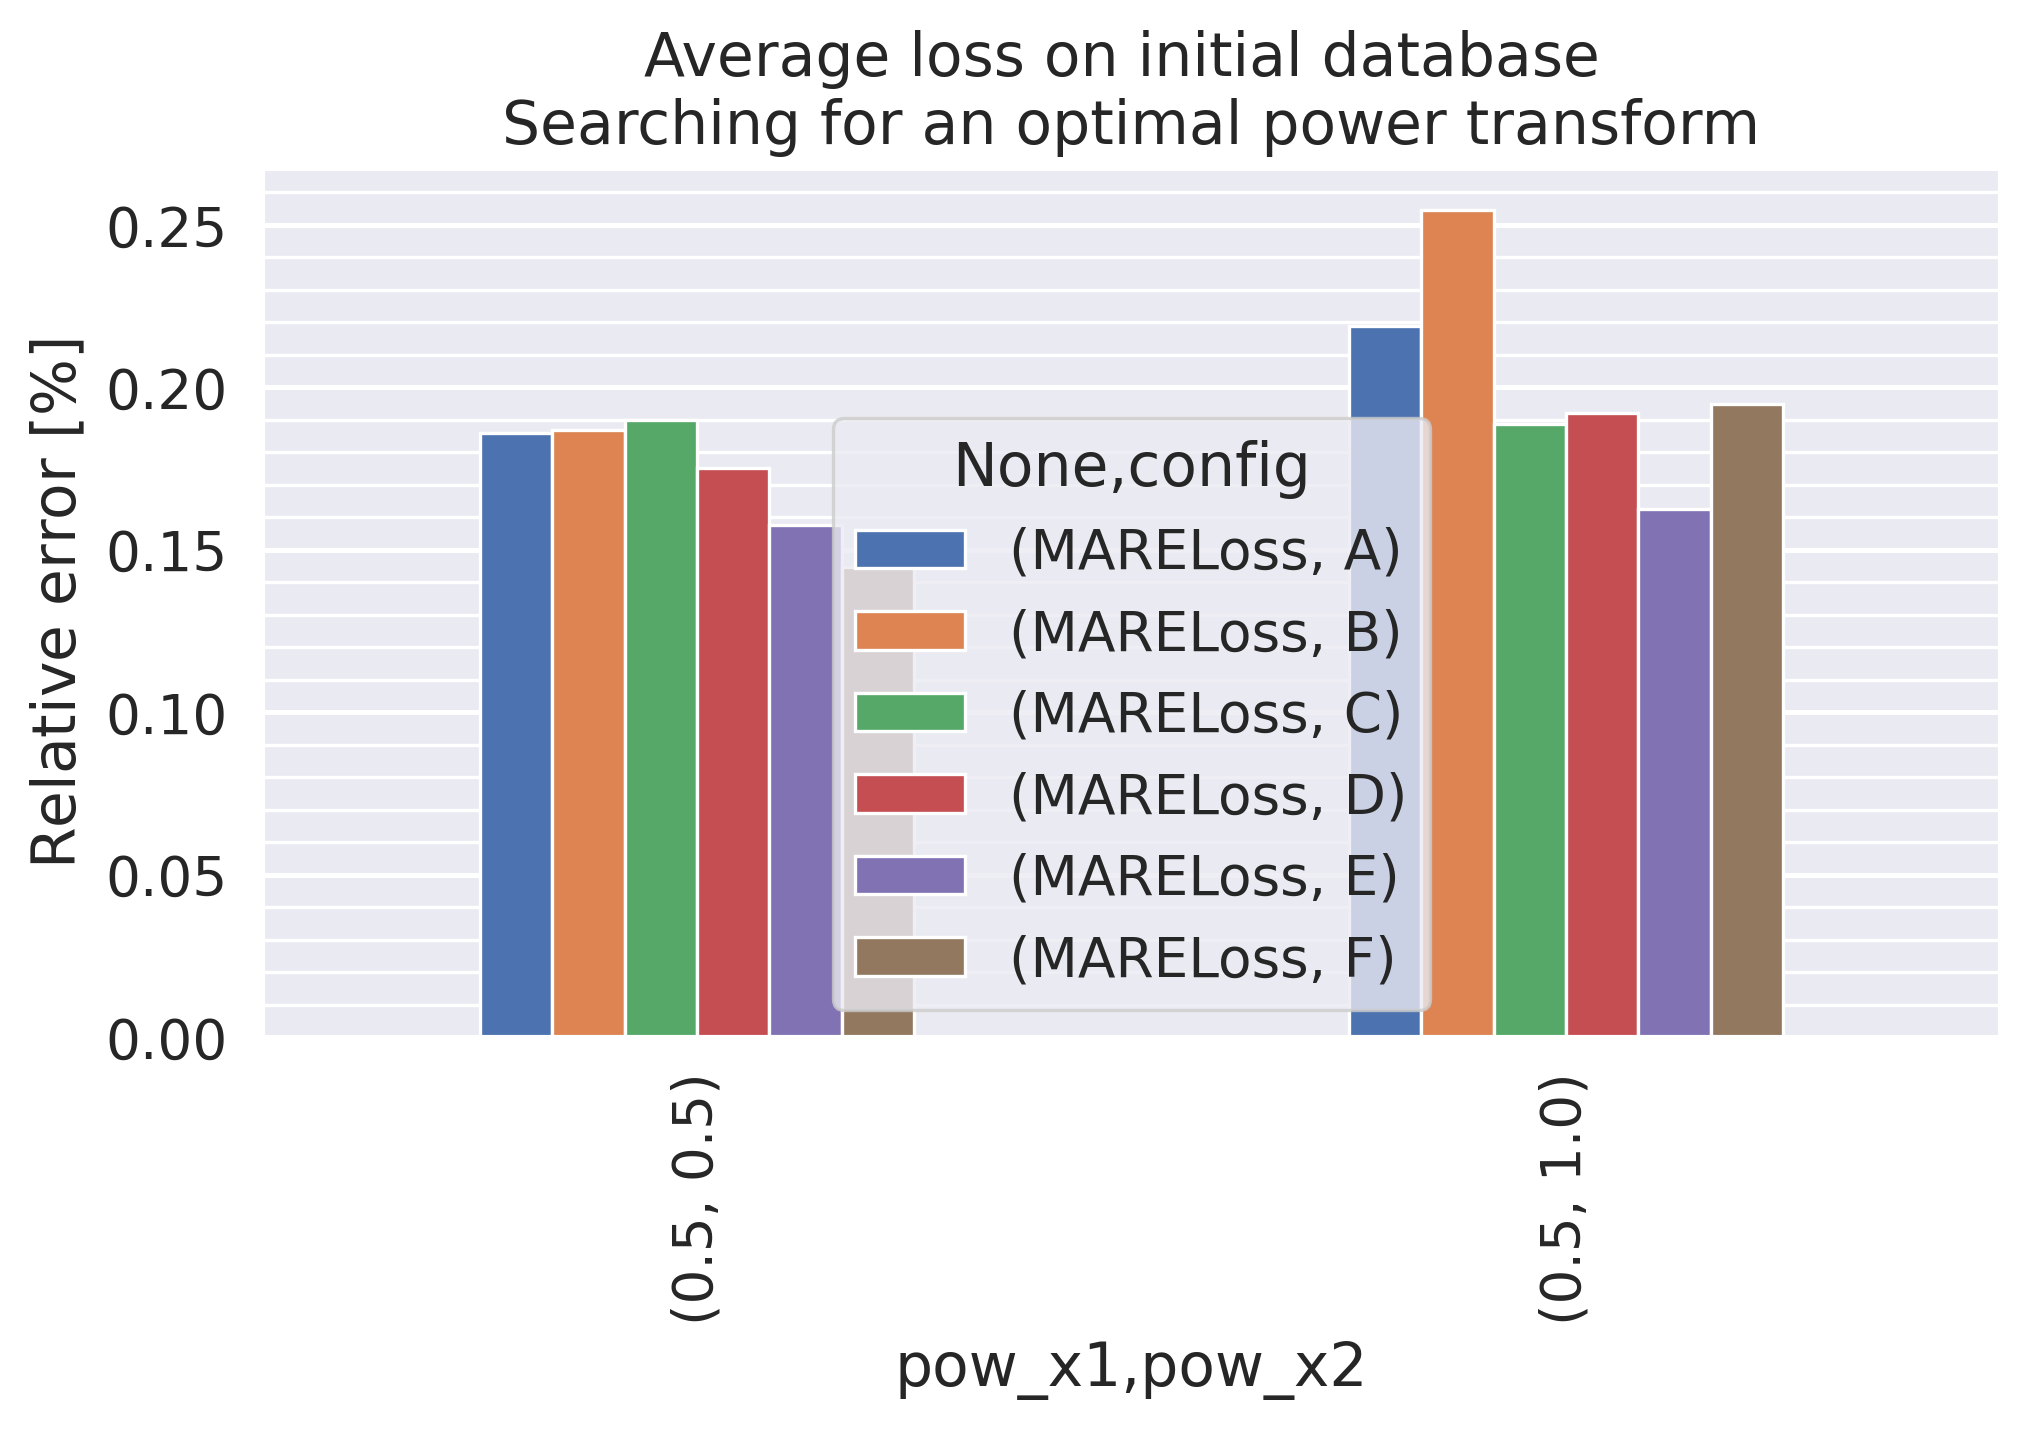

In [32]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]
               [all_wavs_configABCD.use_bg!='range_corr']
               [all_wavs_configABCD.use_power!=False]
               [all_wavs_configABCD.db=='initial'][all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['pow_x1','pow_x2'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Average loss on initial database \n Searching for an optimal power transform ')

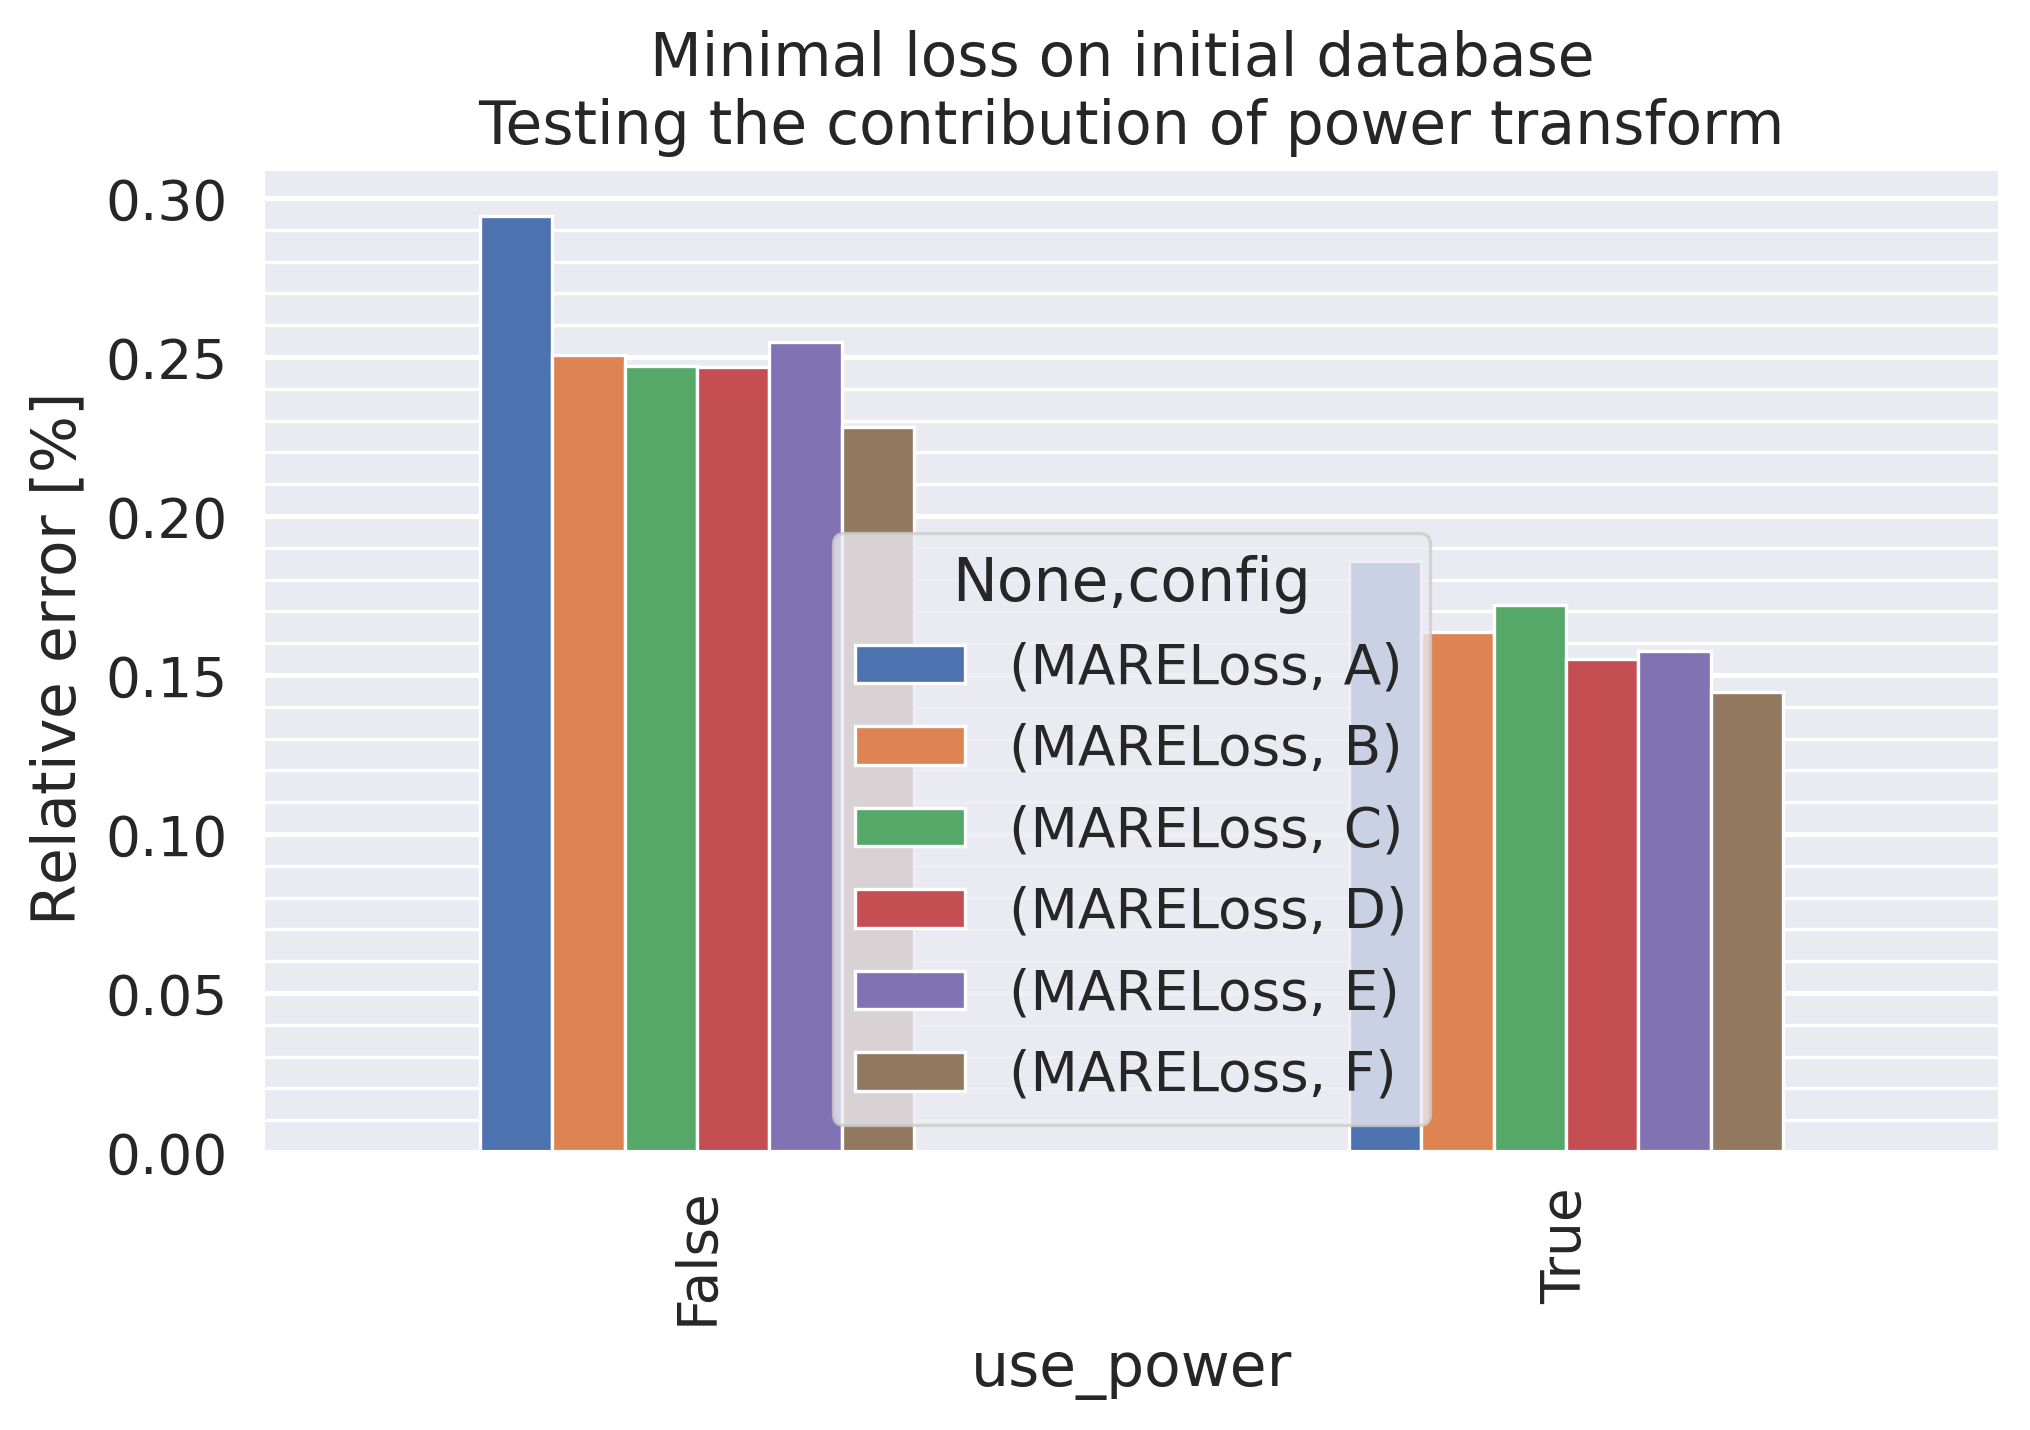

In [33]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]
                         #[all_wavs_configABCD.use_bg!='range_corr']
                         [all_wavs_configABCD.db=='initial']
                         [all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Minimal loss on initial database \n Testing the contribution of power transform ')

In [34]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False][all_wavs_configABCD.db=='initial'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength'],
               aggfunc=np.mean)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Average loss on initial database \n Wavelengths separation comparison ')

No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\1568946709.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False][all_wavs_configABCD.db=='initial'],


In [35]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='initial'][all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','pow_x1','pow_x2'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7),
                 title='Average loss on initial database \n Searching for an optimal power transform ')

No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\1615952314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


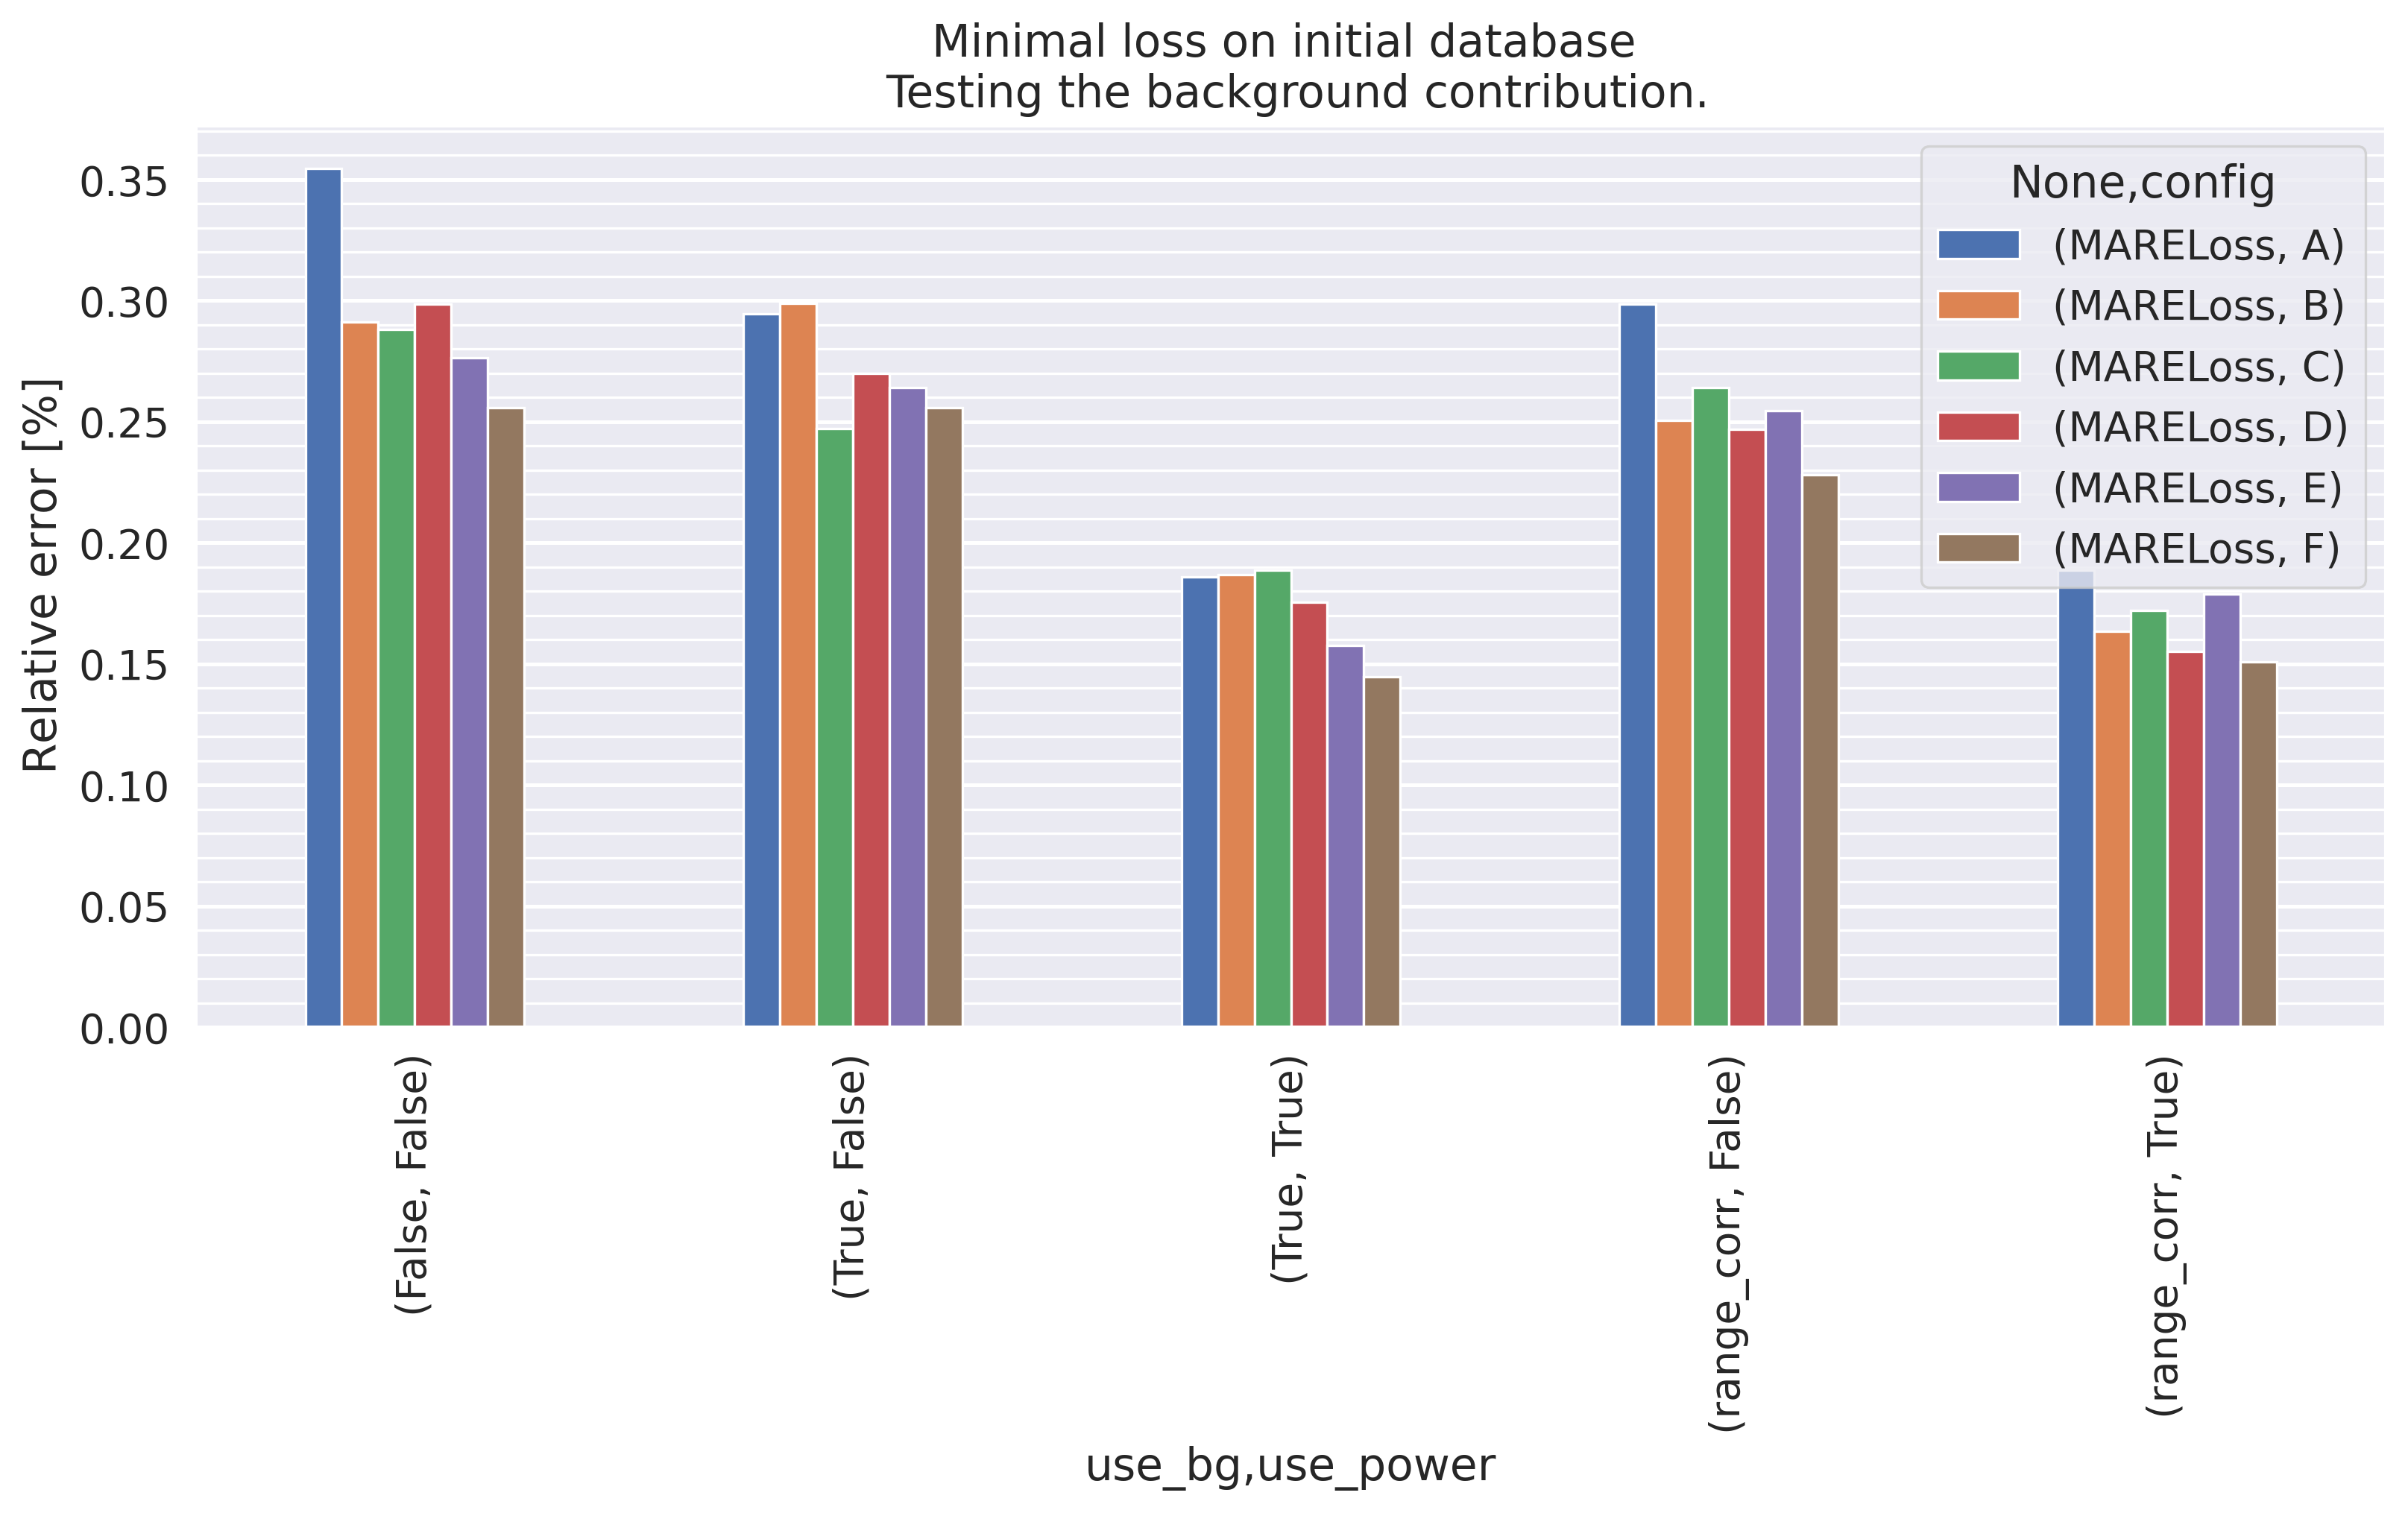

In [36]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
               [all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_bg','use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7), #ylim= [0.0, 0.175],
                 title='Minimal loss on initial database \n Testing the background contribution.')

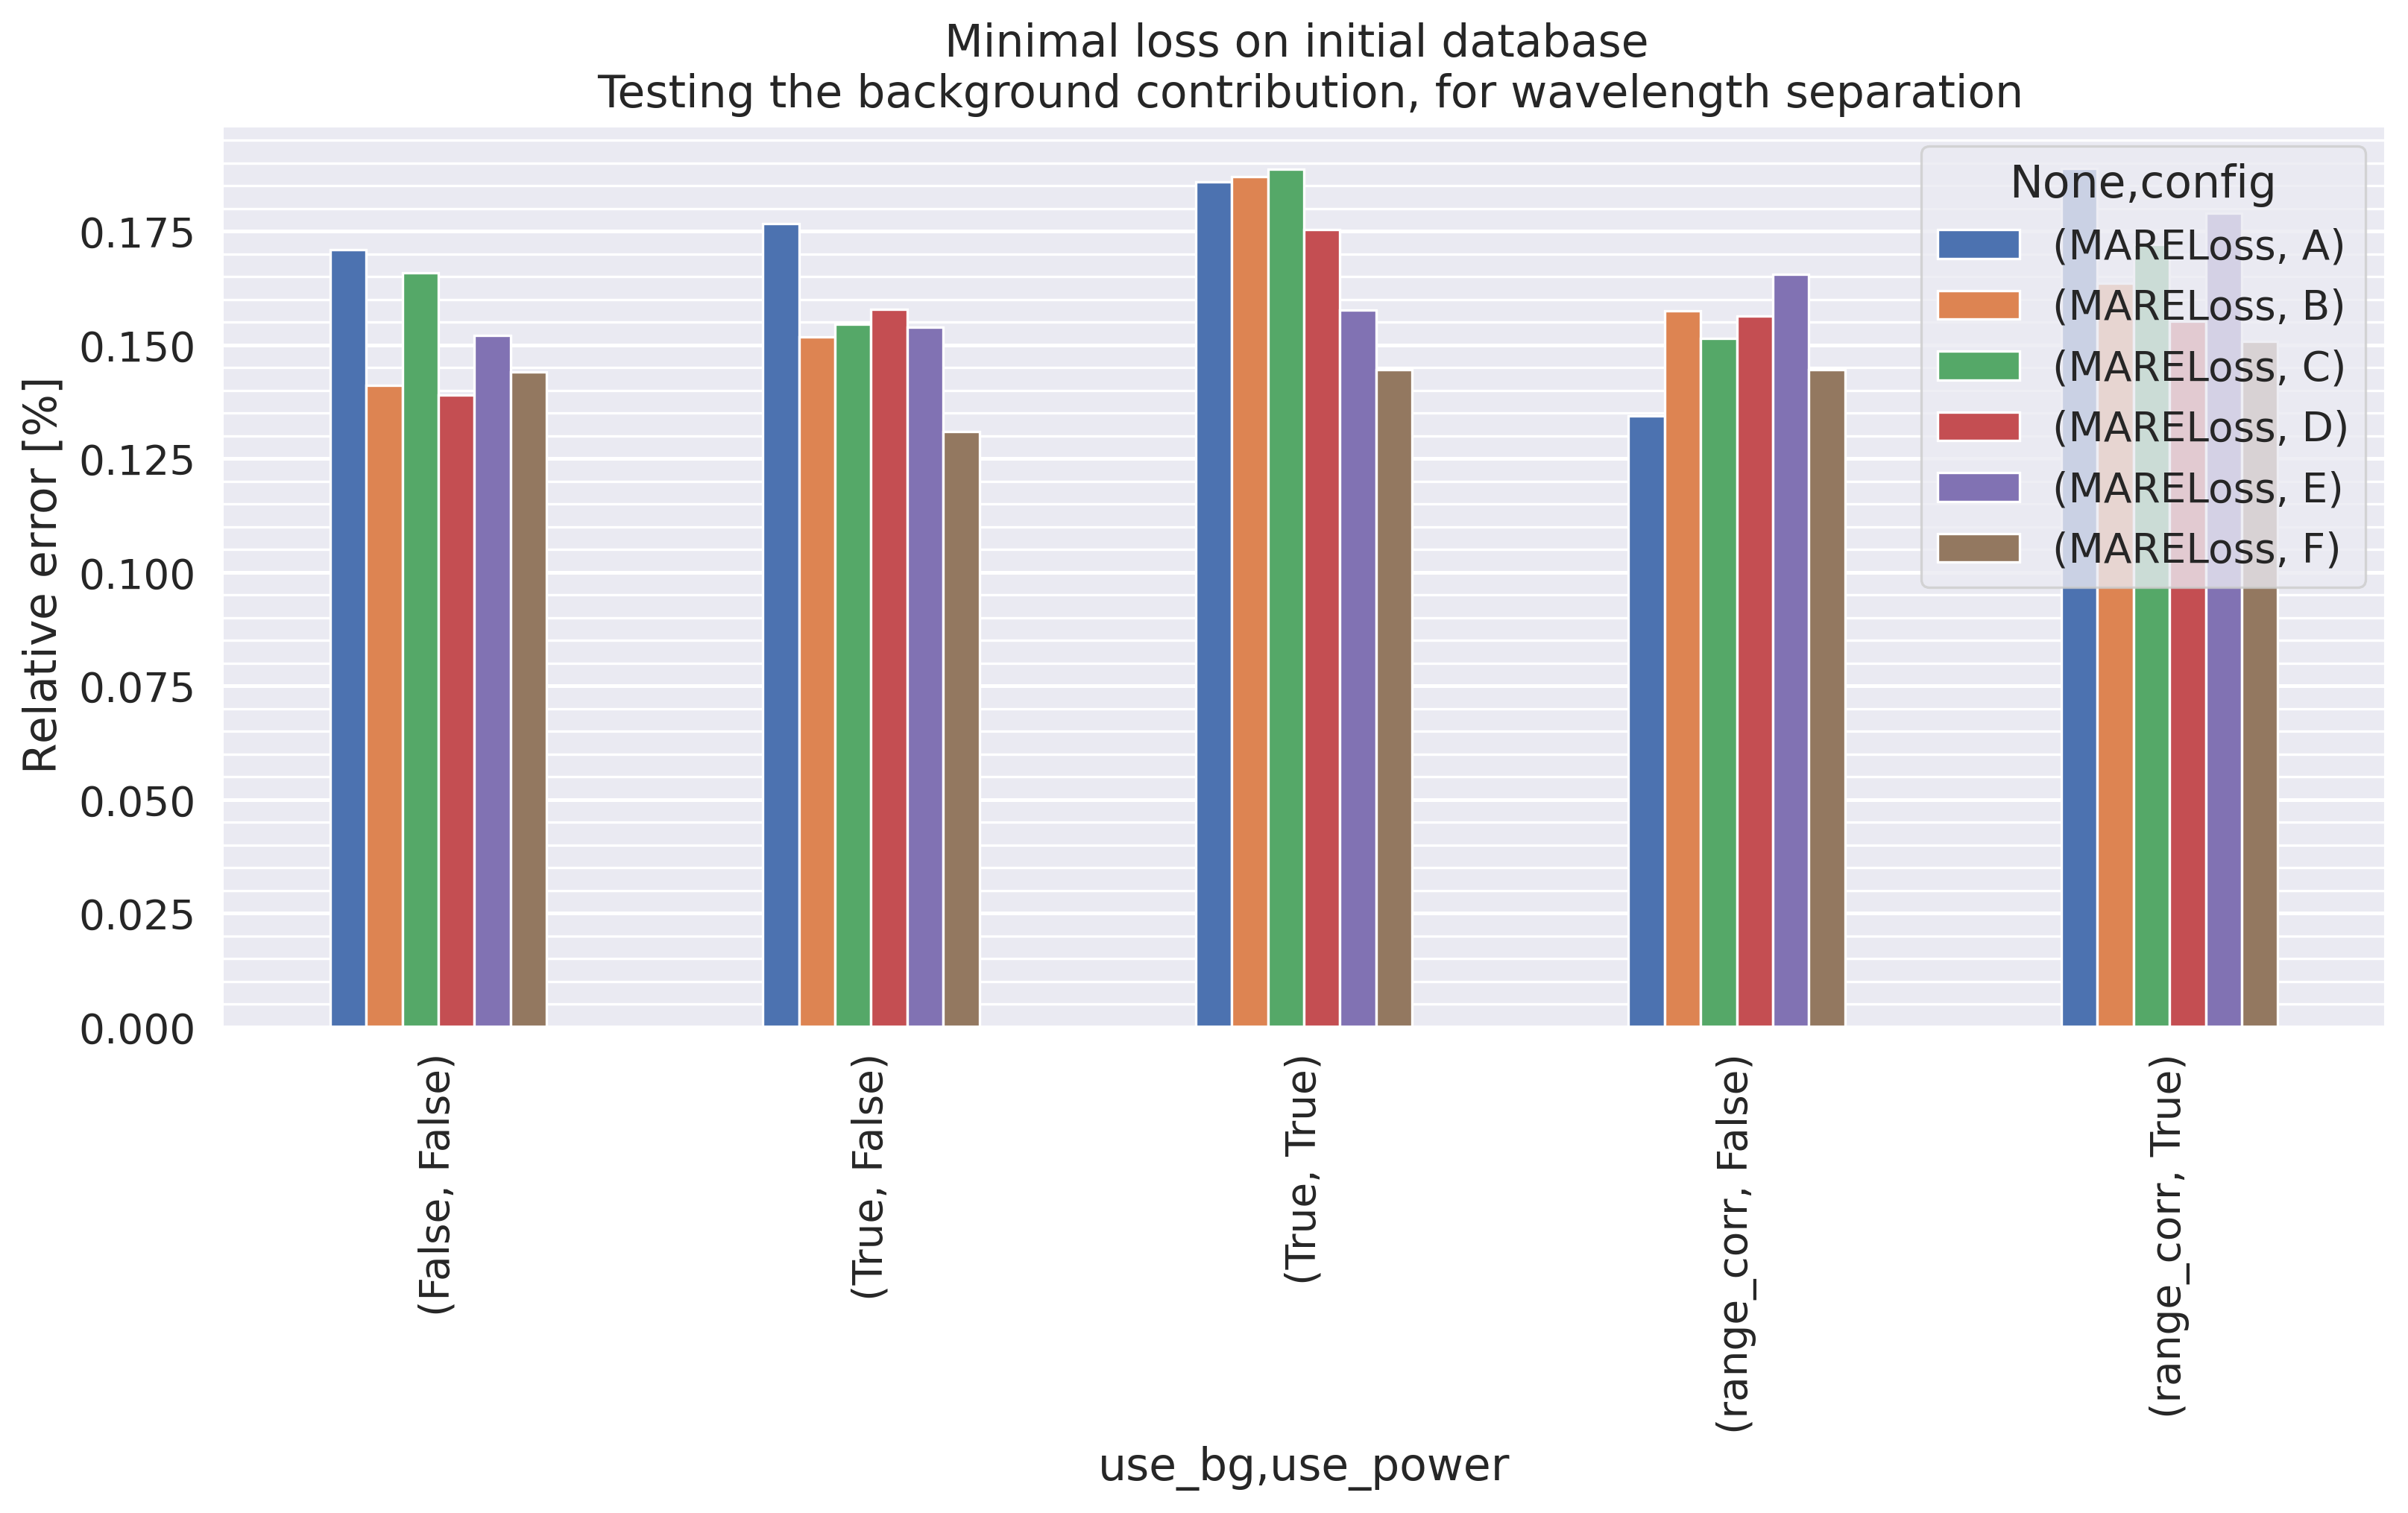

In [50]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
               [all_wavs_configABCD.wavelength!='355'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_bg','use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7), #ylim= [0.0, 0.175],
                 title='Minimal loss on initial database \n Testing the background contribution, for wavelength separation')

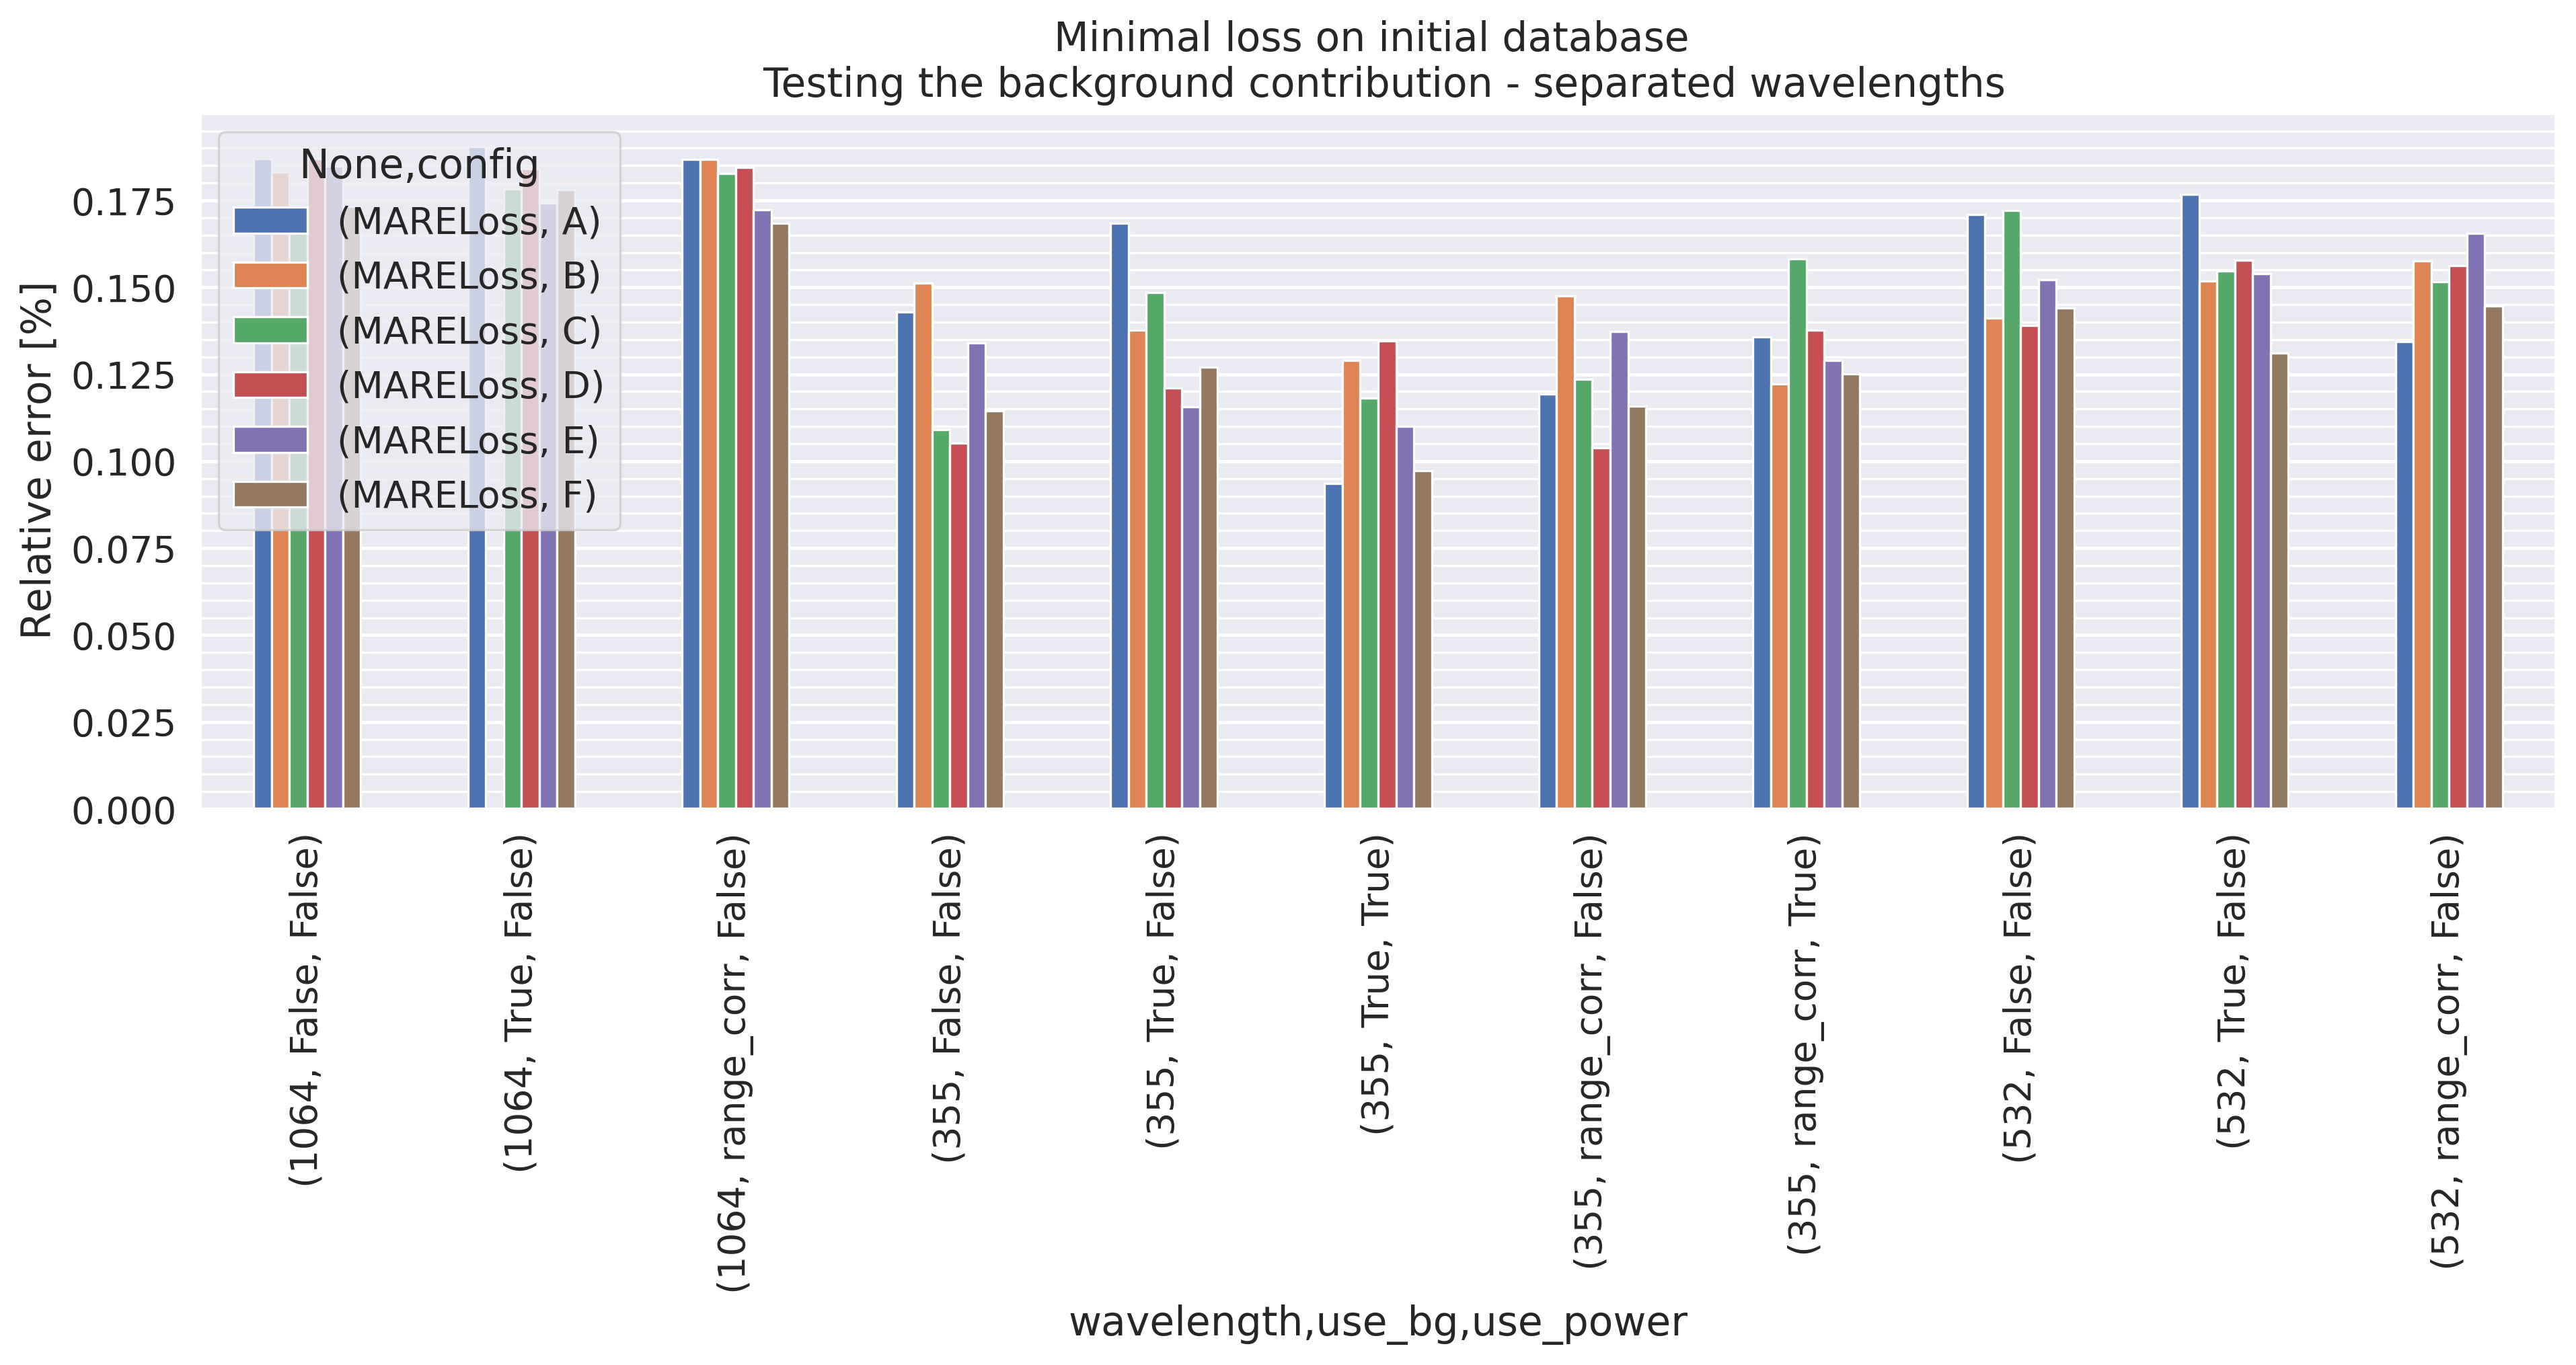

In [53]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
               [all_wavs_configABCD.wavelength!='all'],#[all_wavs_configABCD.use_power==True],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','use_bg','use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(13, 7),
                 title='Minimal loss on initial database \n Testing the background contribution - separated wavelengths')


In [39]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='initial']
                   [all_wavs_configABCD.wavelength==wavelength],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['use_bg', 'pow_x2','pow_x3'],
                   aggfunc=np.min)

    plot_pivot_table(p_table, figsize=(11, 7), ylim= [0.0, 0.2],
                     title=f'Minimal loss on initial database \n'+
                           fr'Testing the background contribution - ${wavelength}[\rm nm]$')

No results to display!
No results to display!
No results to display!


In [40]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]
               [all_wavs_configABCD.use_bg!='range_corr']
               [all_wavs_configABCD.db=='extended']
               [all_wavs_configABCD.wavelength=='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Minimal loss on initial database \n Testing the contribution of power transform ')

No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\920632273.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg!=True]


In [41]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='extended'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Average loss on the extended database \n Wavelengths separation comparison ')

No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\174102017.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


In [42]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='extended'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','use_power'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(7, 5),
                 title='Minimal loss on the extended database \n Testing wavelengths separation')

No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\2517525542.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


In [43]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
               [all_wavs_configABCD.db=='extended']
               [all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','pow_x1','pow_x2'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7),
                 title='Minimal loss on extended database \n Searching for an optimal power transform ')

No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\3289709638.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


In [44]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
                   [all_wavs_configABCD.wavelength==wavelength],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['pow_x1','pow_x2','db'],
                   aggfunc=np.mean)

    plot_pivot_table(p_table, figsize=(11, 9),
                     title=f'Minimal loss on extended database \n Testing 1st model - '+
                           fr'${wavelength}[\rm nm]$' )

No results to display!
No results to display!
No results to display!


C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\3977630907.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\3977630907.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]
C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\3977630907.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_bg==False]


In [45]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='extended']
               [all_wavs_configABCD.wavelength!='all'],
               values=['MARELoss'],
               columns= ['config'],
               index=['use_bg'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(11, 7),
                 title='Minimal loss on extended database \n Testing the background contribution - separated wavelengths')

C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\447757422.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.db=='extended']


No results to display!


In [46]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]
                   [all_wavs_configABCD.wavelength==wavelength],#[all_wavs_configABCD.db!='initial_db_overlap'],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['use_bg', 'db'],
                   aggfunc=np.min)

    plot_pivot_table(p_table, figsize=(11, 9), ylim= [0.0, 0.2],
                     title=f'Minimal loss on extended database \n Testing 2nd model - '+
                           fr'${wavelength}[\rm nm]$' )
    

No results to display!

C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\4217097435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]
C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\4217097435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]
C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\4217097435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power]



No results to display!
No results to display!


In [47]:
for wavelength in [355,532,1064]:
    p_table = pd.pivot_table(all_wavs_configABCD
                   [all_wavs_configABCD.wavelength==wavelength],
                   values=['MARELoss'],
                   columns= ['config'],
                   index=['use_bg', 'pow_x2','pow_x3'],
                   aggfunc=np.min)

    plot_pivot_table(p_table, figsize=(11, 7), ylim= [0.0, 0.2],
                     title=f'Minimal loss on extended database \n'+
                           fr'Testing the background contribution - ${wavelength}[\rm nm]$')

No results to display!
No results to display!
No results to display!


In [48]:
p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power==False]
               [all_wavs_configABCD.db=='extended'],
               values=['MARELoss'],
               columns= ['config'],
               index=['wavelength','db'],#'use_bg'],
               aggfunc=np.min)

plot_pivot_table(p_table, figsize=(15, 10),
                 title='Minimal loss on the extended database \n Testing results without power transform')




No results to display!

C:\Users\addalin\AppData\Local\Temp\ipykernel_29260\415540291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_table = pd.pivot_table(all_wavs_configABCD[all_wavs_configABCD.use_power==False]
